# Case Study: Modeling Car Insurance Claims

### Tasks
- Identify the single feature of the data that is the best predictor of whether a customer will put in a claim (the `outcome` column), excluding the `id` column.
- Store as a DataFrame called `best_feature_df`, containing columns named `best_feature` and `best_accuracy` with the name of the feature with the highest accuracy, and the respective accuracy score.

In [65]:
import pandas as pd
import numpy as np 
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
car_insurance = pd.read_csv('../Data/car_insurance.csv')
car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [67]:
print(car_insurance['speeding_violations'].isna().sum())
print(car_insurance['duis'].isna().sum())
print(car_insurance['past_accidents'].isna().sum())
print(car_insurance['annual_mileage'].isna().sum())

0
0
0
957


In [68]:
# Imputation for 'annual_mileage' column using median 
car_insurance['annual_mileage'] = car_insurance['annual_mileage'].fillna(
    car_insurance['annual_mileage'].median()
)

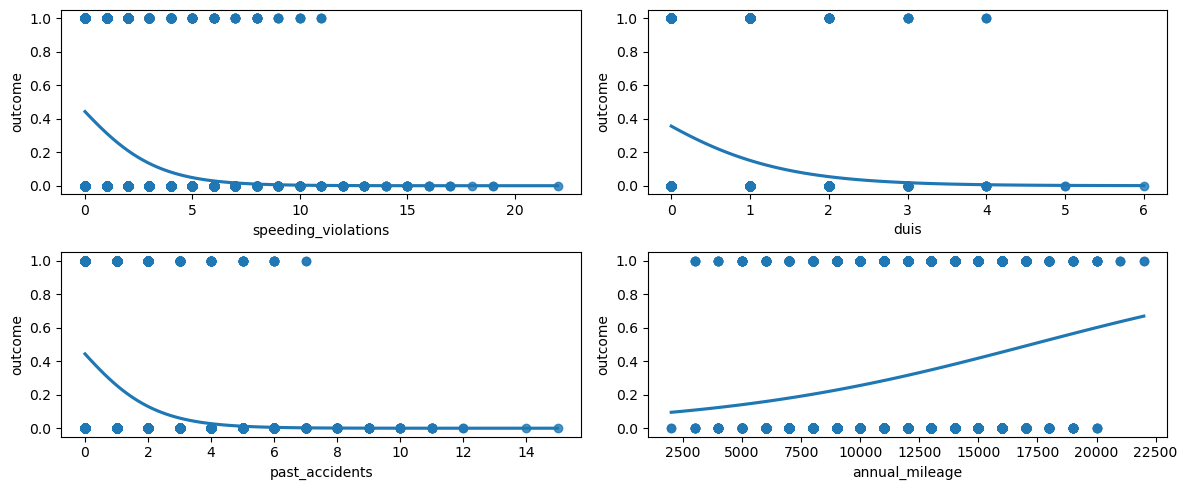

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax = ax.flatten()   # Flattening allows 1D indexing for n-dimensional ax array


predictors_list = [
    'speeding_violations',
    'duis',
    'past_accidents',
    'annual_mileage'
]

for i, pred in enumerate(predictors_list):
    sns.regplot(
        x=pred,
        y='outcome',
        data=car_insurance,
        logistic=True,
        ci=None,
        ax=ax[i]
    )

plt.tight_layout()
plt.show()

In [70]:
spd_mdl = logit('outcome ~ speeding_violations', data=car_insurance).fit()
dui_mdl = logit('outcome ~ duis', data=car_insurance).fit()
accident_mdl = logit('outcome ~ past_accidents', data=car_insurance).fit()
mileage_mdl = logit('outcome ~ annual_mileage', data=car_insurance).fit()

Optimization terminated successfully.
         Current function value: 0.558922
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598699
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549220
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.605605
         Iterations 5


In [71]:
actual_otcome = car_insurance['outcome']



spd_predict = np.round(spd_mdl.predict())
dui_predict = np.round(dui_mdl.predict())
accident_predict = np.round(accident_mdl.predict())
mileage_predict = np.round(mileage_mdl.predict())

mdl_list = [
    spd_predict,
    dui_predict,
    accident_predict,
    mileage_predict
]


for var, mdl in zip(predictors_list, mdl_list):
    
    print(f'Confusion Matrix for {var}:\n')

    outcome_df = pd.DataFrame({
        'outcome_actual':actual_otcome,
        'outcome_predict': mdl
    })

    print(outcome_df.value_counts(sort=False))
    print('\n\n')



Confusion Matrix for speeding_violations:

outcome_actual  outcome_predict
0.0             0.0                6867
1.0             0.0                3133
Name: count, dtype: int64



Confusion Matrix for duis:

outcome_actual  outcome_predict
0.0             0.0                6867
1.0             0.0                3133
Name: count, dtype: int64



Confusion Matrix for past_accidents:

outcome_actual  outcome_predict
0.0             0.0                6867
1.0             0.0                3133
Name: count, dtype: int64



Confusion Matrix for annual_mileage:

outcome_actual  outcome_predict
0.0             0.0                6801
                1.0                  66
1.0             0.0                3030
                1.0                 103
Name: count, dtype: int64





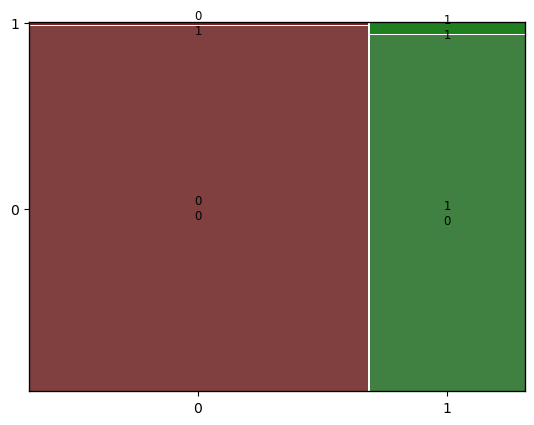

In [72]:
from statsmodels.graphics.mosaicplot import mosaic

conf_matrix = mileage_mdl.pred_table()
mosaic(conf_matrix)
plt.show()

In [73]:
print(conf_matrix)

[[6801.   66.]
 [3030.  103.]]
